In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

## Load Data

In [7]:
df_digit = pd.read_csv('./handwriting_digits.csv')

# Set target and features
y = df_digit['label']
x = scale(df_digit.drop(['label'], axis=1))


# Split features into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

AxesImage(54,36;334.8x217.44) 		 0


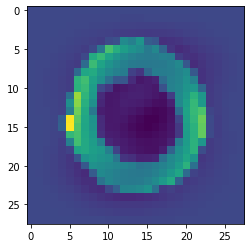

In [8]:
import matplotlib.pyplot as plt
print(plt.imshow(x[1].reshape(28,28)), '\t\t', y[1])

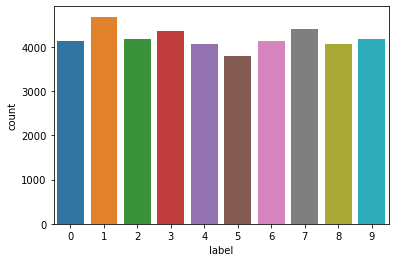

In [9]:
import seaborn as sns

sns.countplot(y)

## Build SVM Model

In [13]:
%%time

from sklearn.svm import SVC

model_svm_digit = SVC().fit(x_train, y_train)
y_test_pred = model_svm_digit.predict(x_test)

print('Classification report (Support Vector Classifier):')
print(classification_report(y_test, y_test_pred))

Classification report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.98      0.99      0.98       940
           2       0.92      0.98      0.95       835
           3       0.96      0.94      0.95       873
           4       0.96      0.96      0.96       829
           5       0.96      0.95      0.95       731
           6       0.97      0.97      0.97       800
           7       0.94      0.97      0.96       850
           8       0.97      0.94      0.96       846
           9       0.96      0.93      0.94       843

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Wall time: 6min 13s
